In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

c:\Users\Kwon\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Kwon\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Kwon\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [44]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

### 함수설정

In [3]:
def change_token(data, change_dict):
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[change_tokens_dict[token] if token in change_tokens_dict.keys() else token for token in x])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[change_tokens_dict[token] if token in change_tokens_dict.keys() else token for token in x])

In [4]:
def kw_rate_list(data, keyword_list):
    
    for keyword in keyword_list:
        print('전체 리뷰', len(data), '건 중 "', keyword, '" 가 포함된 리뷰 비율 :', round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2), '%')
        #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)
    #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)

In [5]:
def kw_rate(data, keyword):
    return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data)), 4)
    #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)

In [7]:
def kw_in_token(data, keyword):
    print('전체 리뷰', len(data), '건 중', "'", keyword, "' 가 포함된 리뷰 총", len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ReviewText']

In [28]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [37]:
def wc_kw(data, kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        print(keyword, '키워드가 포함된 리뷰의 용언 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        print(keyword, '키워드가 포함된 리뷰의 명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    elif kw_option == 3:
        print(keyword, '키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화')
        return wc_analysis(data[data['tokens'].apply(lambda x:keyword in x)]['tokens'])
    else:
        return print('옵션 확인')

In [39]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

### 데이터 로드

In [2]:
kurly_data = pd.read_csv(r"C:\Users\Kwon\Desktop\eatthecompany_project\doeat2023\KYJ\honey_stick\data\kurly_data_analysis.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\Kwon\Desktop\eatthecompany_project\doeat2023\KYJ\honey_stick\data\workerbee_data_analysis.csv", index_col=0)
kakao_data = pd.read_csv(r"C:\Users\Kwon\Desktop\eatthecompany_project\doeat2023\KYJ\honey_stick\data\kakao_data_analysis.csv", index_col=0)

In [8]:
for data in [kakao_data, kurly_data, workerbee_data]:
    data.drop_duplicates(subset='ReviewText', keep='first', inplace=True)

In [9]:
for data in [kakao_data, kurly_data, workerbee_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x: eval(x))
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x: eval(x))

In [11]:
print(str(len(kakao_data))+'개 리뷰 중', "'선물' 키워드 포함 리뷰 비율 :", kw_rate(kakao_data, '선물')*100, '%')

1921개 리뷰 중 '선물' 키워드 포함 리뷰 비율 : 41.8 %


In [47]:
workerbee_data[(workerbee_data['ProductCode']==828517)|(workerbee_data['ProductCode']==1571702)]

1221

In [50]:
kw_rate_list(workerbee_data[(workerbee_data['ProductCode']==1970378)], ['고급', '예쁘다', '귀엽다'])

전체 리뷰 109 건 중 " 고급 " 가 포함된 리뷰 비율 : 0.0 %
전체 리뷰 109 건 중 " 예쁘다 " 가 포함된 리뷰 비율 : 37.61 %
전체 리뷰 109 건 중 " 귀엽다 " 가 포함된 리뷰 비율 : 25.69 %


In [51]:
kw_rate_list(workerbee_data[(workerbee_data['ProductCode']==704639)|(workerbee_data['ProductCode']==704862)|(workerbee_data['ProductCode']==704591)|
                            (workerbee_data['ProductCode']==1159441)|(workerbee_data['ProductCode']==704664)|(workerbee_data['ProductCode']==751922)], ['고급', '예쁘다', '귀엽다'])

전체 리뷰 571 건 중 " 고급 " 가 포함된 리뷰 비율 : 1.4 %
전체 리뷰 571 건 중 " 예쁘다 " 가 포함된 리뷰 비율 : 19.26 %
전체 리뷰 571 건 중 " 귀엽다 " 가 포함된 리뷰 비율 : 10.33 %


### 불용어 제거

In [10]:
change_tokens_dict = {'거트':'요거트', '릭요거트':'요거트', '그릭요거트':'요거트', '이쁘':'예쁘', '패키징':'패키지', '패키':'패키지', '요거트볼':'요거트',
                      '요거':'요거트', '꿀요거트':'요거트', '여거트':'요거트', '이뿌':'예쁘', '기엽':'귀엽', '예뿌':'예쁘', '않':'아니', '제주벌꿀':'제주',
                      '쥬스':'주스', '맛있':'맛'}

In [11]:
rm_nouns = ['것', '씩', 'ㅎ', '거', '저', 'ㅎㅎ', '들', '포', '꿀', '스틱', '구매', '용', '형', '하나', '수', '개', '소',
            '번', '1', 'ㅋ', '중', '굿', '분', '요', '편', '듯', '적', '님', '나', '제', '대', '비', '전', '뭐', '몇',
            '데', '만', '다', '떼', '날', '꺼', '겸', '점', '이', '성', '이거', 'ㅋㅋㅋㅋ', 'ㅎㅎㅎ', '등', '1', '2', '3', '디', '년',
            '그거', '재', '재재재', '벌꿀']#선물

In [12]:
rm_verbs = ['하', '이', '있', '먹', '같', '되', '스럽', '지', '좋', '보', '받', '들']

불용어 제거

In [13]:
for data in [kurly_data, workerbee_data, kakao_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

용어 통일

In [14]:
for data in [kurly_data, workerbee_data, kakao_data]:
    change_token(data, change_tokens_dict)

In [15]:
for data in [kurly_data, workerbee_data, kakao_data]:
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[x_token+'다' for x_token in x])

In [16]:
workerbee_data.head(1)

,ProductCode,ProductName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,ReviewText,isGift,ReviewTime,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
0,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6390415,['[구매단위]박스구매(12개입)'],hai***,5,"°고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장...",F,2023-08-11 05:42:48,"[일, 지인, 선물, 주문, 포장, 귀엽, 얼그레이, 향, 코, 끝]","[고맙다, 생기다, 드리다, 진하다]",1,0.994407


In [26]:
workerbee_data.drop(['heartCount','reviewCount','itemReviewNo','isGift'], axis=1).head(1)

,ProductCode,ProductName,lastSalePrice,optionValue,userId,point,ReviewText,ReviewTime,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
0,1308881,[꿀카라멜] 워커비 허니 얼그...,3000,['[구매단위]박스구매(12개...,hai***,5,"°고마운 일이 생겨, 지인분께...",2023-08-11 05:42:48,"[일, 지인, 선물, 재, 주...","[고맙, 생기, 드리, 진하]",1,0.994407


In [17]:
len(workerbee_data['ProductCode'].unique())

46

In [54]:
#friend = ['친구']['팀원', '동료']['남편']['스승', '선생']['동생', '언니']['조카']
same = ['친구','동생','베프','여친','남친','동료','누나','오빠','청년', '젊은', '20대', '30대', '연인', '남편', '팀원', '언니'] #1 또래
over = ['스승', '삼촌','이모','고모','상사','엄마','어머니', '아빠','아버지','할아버지', '할머니', '부모','조부모','어른','어르신','시부모','시어머','시아버'] # 2 어른
under = ['어린이', '아이', '자녀', '아들', '딸','아기','애기', '조카'] # 3 아이

In [60]:
def age_find(token_list):
    age = 0
    for i in under:
        if i in token_list:
            age = 1
            continue
    for i in over:
        if i in token_list:
            age = 2
            continue
    for i in same:
        if i in token_list:
            age = 3
            continue
    return age

In [56]:
workerbee_data['token'] = workerbee_data['token_nouns_bareun']+workerbee_data['token_verbs_bareun']

In [63]:
workerbee_data['age_label'] = workerbee_data['token'].apply(lambda x:age_find(x))

In [65]:
workerbee_data.to_excel(r'C:\Users\Kwon\Desktop\eatthecompany_project\doeat2023\KYJ\honey_stick\analysis\workerbee_age_label.xlsx')

In [85]:
kw_in_token(kurly_data, '선생')

전체 리뷰 10476 건 중 ' 선생 ' 가 포함된 리뷰 총 21 건


3738                                           토마토랑 갈아먹을려고 샀어요 딱 한잔분량이라 간편해요 트레이너 선생님이 꿀은 살 안 찐대요
5664                                                                         어린이집 선생님들께 선물했는데 좋아요
5916                                                    어린이집 졸업을 앞두고 8개 각각 선생님들 선물로 샀는데 좋을것같아요 ^^
8140                                                   유치원선생님께 선물드렸어요 포장도 예쁘고 가볍게 드리기 좋은 선물구성인듯해요
8141                                                                             우리 아이 돌봄 선생님께 선물
8176     선생님께 선물했는데 너무 감사하다며 이렇게 찍어보내셨더라고여^^  먹어보지는 않았지만 후기가 좋아서  믿고 구매해서 선물 했어요~  드리면서도 좋더라고여^^ 
8308                                                                                  얼집선생님 명절선물용
8310                                                                    이쁘게포장되어와서 선생님들. 이모님께 돌렸어요
8327                                                                       선생님 선물 드리려고 샀어요 좀 작긴해요
8329                                                어린이집 선생님 명절 선물로 구매했어요. 기분좋은 선물이 된것 같아 뿌듯합니다!!
8397                

In [17]:
workerbee_data.head(1)

,ProductCode,ProductName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,ReviewText,isGift,ReviewTime,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
0,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6390415,['[구매단위]박스구매(12개입)'],hai***,5,"°고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장...",F,2023-08-11 05:42:48,"[일, 지인, 선물, 주문, 포장, 귀엽, 얼그레이, 향, 코, 끝]","[고맙다, 생기다, 드리다, 진하다]",1,0.994407


In [19]:
workerbee_data['ProductName'].unique()

array(['[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g', '[꿀선물] 워커비 기프트세트 미니자(3-4개입)',
       '[꿀선물] 워커비 기프트세트 미니팩', '[건강기능식품] 워커비 프로폴리스 스프레이 20ml',
       '[꿀선물] 워커비 기프트세트 미니자(8개입)', '[꿀선물] 워커비 기프트세트 콤보',
       '[핑크레몬꿀] 워커비 보틀 핑크레모네이드 355g', '[머그컵] 워커비 머그 12oz',
       '[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)', '워커비 허니 레몬 30g',
       '[29CM 단독] 워커비 해피팩', '[29CM 단독] 워커비 더블 미니팩(6개입x2)',
       '[꿀선물] 워커비 기프트세트 보틀', '[바닐라꿀] 워커비 보틀 바닐라 355g', '워커비 허니 얼그레이 30g',
       '[얼그레이꿀] 워커비 보틀 얼그레이 355g', '[모히또꿀] 워커비 허니 모히또 355g', '쇼핑백 2종',
       '[레몬꿀] 워커비 보틀 레몬 355g', '[아카시아꿀] 워커비 보틀 오리지널 355g',
       '[유자꿀] 워커비 허니 유자 355g', '[초코꿀] 워커비 미니팩 초코 120g(10gx12ea)',
       '[초코꿀] 워커비 보틀 초코 355g', '[밀랍초] 워커비 해피 허니 캔들', '워커비 허니 시나몬 30g',
       '[계피꿀] 워커비 보틀 시나몬 355g', '[그린티꿀] 워커비 보틀 그린티(말차) 355g',
       '[바닐라꿀] 워커비 미니팩 바닐라 120g(10gx12ea)',
       '[계피꿀] 워커비 미니팩 시나몬 120g(10gx12ea)', '워커비 허니 초코 30g',
       '워커비 허니 바닐라 30g', '워커비 허니 진저 30g', '워커비 허니 모히또 30g',
       '워커비 허니 오리지널 30g', '[생강꿀] 워커비 보틀 진저 355g', '[꿀선물] 허니 홈카페 키트',
 

In [22]:
workerbee_data[(workerbee_data['ProductName']=='[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)')&(workerbee_data['sentiment_label']==0)]

,ProductCode,ProductName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,ReviewText,isGift,ReviewTime,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
2368,704864,[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea),15800,523,95,5449866,['[쇼핑백]선택안함'],ppi***,4,탄산수에 타 먹으면 레모네이드 같다기에 샀는데 물 100미리 정도에 한포타니 맛...,F,2023-04-15 20:50:16,"[탄산수, 레모네이드, 물, 100, 미리, 정도, 포타니, 맛, 레모네이드]","[타다, 사다, 나다, 비싸다]",0,0.727085
2408,704864,[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea),15800,523,95,2655229,['[쇼핑백]선택안함'],youn***,4,가격은 많이 아쉬워요 카라멜 주문하면서 같이 구매했어요 맛은 레몬 맛이 진하게 나...,F,2022-01-20 15:03:14,"[가격, 카라멜, 주문, 맛, 레몬, 맛, 물, 음료, 포당, 양, 부족]","[아쉽다, 진하다, 나다, 당떨어지다, 짜다, 타다]",0,0.792809
2423,704864,[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea),15800,523,95,1585741,['[쇼핑백]선택안함'],qlsd***,4,맛은있는데 에이드로 만들어먹기엔 한팩은 넘 소량이에요 탄산수로 만들었을ㄸㅐ 세개는 ...,F,2021-04-29 22:30:45,"[맛, 에이드, 팩, 소량, 탄산수, ㄸㅐ, 여]","[만들다, 만들다, 넣다]",0,0.580353
2431,704864,[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea),15800,523,95,932091,['[쇼핑백]선택안함'],sospir***,3,여름에 탄산수랑 같이 마셔봤는데 1포로는 맛이 그다지 느껴지지는 않더라구요. 손이 ...,F,2020-10-04 20:12:38,"[여름, 탄산수, 맛, 손]","[마시다, 느끼다, 아니다, 가지다, 아니다]",0,0.891710


In [ ]:
kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:'양' in x)]

In [26]:
len(kurly_data[kurly_data['sentiment_label']==0])

576

In [32]:
kurly_data['tokens'] = kurly_data['token_nouns_bareun']+kurly_data['token_verbs_bareun']
kakao_data['tokens'] = kakao_data['token_nouns_bareun']+kakao_data['token_verbs_bareun']
workerbee_data['tokens'] = workerbee_data['token_nouns_bareun']+workerbee_data['token_verbs_bareun']

In [34]:
print(len(kurly_data[kurly_data['sentiment_label']==0]))
frequency_analysis(kurly_data[kurly_data['sentiment_label']==0]['tokens'], 10)

576


,Token,Frequency
0,맛,85
1,양,80
2,아니다,78
3,사다,71
4,선물,60
5,적다,54
6,오다,52
7,비싸다,50
8,없다,49
9,편하다,48


In [35]:
print(len(kakao_data[kakao_data['sentiment_label']==0]))
frequency_analysis(kakao_data[kakao_data['sentiment_label']==0]['tokens'], 10)

41


,Token,Frequency
0,선물,18
1,아니다,12
2,배송,9
3,오다,9
4,포장,8
5,기분,7
6,박스,6
7,맛,5
8,없다,5
9,주소,5


In [36]:
print(len(workerbee_data[workerbee_data['sentiment_label']==0]))
frequency_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['tokens'], 10)

141


,Token,Frequency
0,맛,91
1,선물,46
2,사다,41
3,아니다,38
4,얼그레이,30
5,생각,26
6,만들다,26
7,아쉽다,23
8,제품,22
9,그렇다,22


맛 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


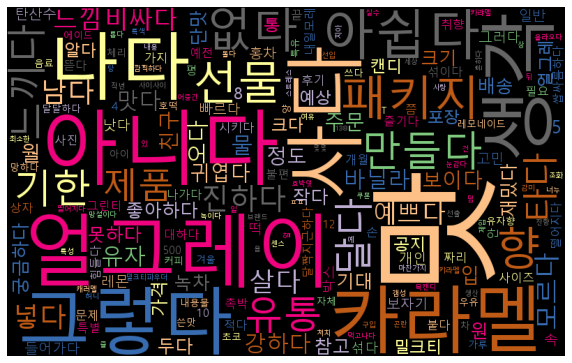

In [40]:
wc_kw(workerbee_data[workerbee_data['sentiment_label']==0], 3, '맛')

맛 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


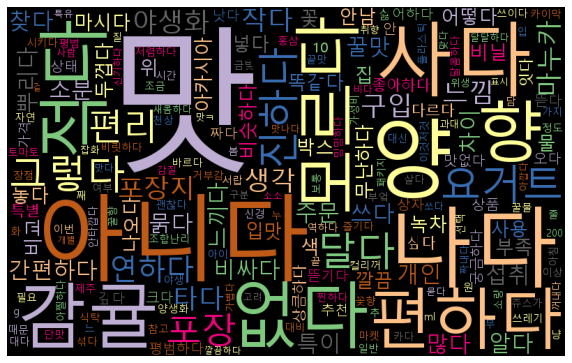

In [41]:
wc_kw(kurly_data[kurly_data['sentiment_label']==0], 3, '맛')

In [46]:
kw_in_token(kurly_data[kurly_data['sentiment_label']==0], '양')

전체 리뷰 576 건 중 ' 양 ' 가 포함된 리뷰 총 76 건


269                                                                                                                                                                                                   양이 적어서 두개는 기본 
343                                                                                                                                                                                       포장지 양에 맞기 만들어야함 너무 길게 만들었음
626                                                                                                                                                                                               솔직히 양은 적어요.. 맛도 평범
1193                                                                                                                                                   생각보다 양이 적은 것 같아요 맛은 그냥 그래요 카이막 때문에 구입했는데 그냥 집에 있는 꿀 사용할 것 같아요
1345                                                                                                                                                

양 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


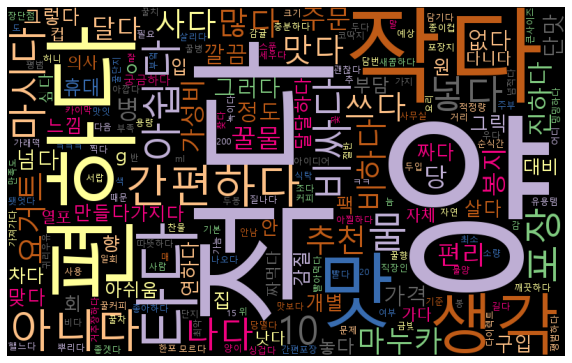

In [42]:
wc_kw(kurly_data[kurly_data['sentiment_label']==0], 3, '양')